In [ ]:
import gensim.downloader as api

# Load the model using gensim.downloader
model_GloVe = api.load("word2vec-google-news-300")

KeyboardInterrupt: 

Vanilla **RNN**

In [ ]:
pip install tensorflow_addons

In [ ]:
import tensorflow_addons as tfa

In [ ]:

from gensim.models import KeyedVectors# Load pre-trained model
# import torch
# import torch.nn as nn
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np
import keras


In [ ]:
# Specify the path to your JSON file
json_file_path = 'ATE_training_data.json'

# Read the JSON file
with open(json_file_path) as f:
    data = json.load(f)

# data
# print(len(data))

# Specify the path to your JSON file
json_file_path = 'ATE_validation_data.json'

# Read the JSON file
with open(json_file_path) as f:
    validation_data = json.load(f)




In [ ]:
# max_len=0
# for key,value in data.items():
#     max_len=max(max_len,len(value['text'].split(" ")))
max_len=78


In [ ]:
c=1
for key, value in data.items():
    word = value['text'].split(" ")
    labels = value['labels']
    new_labels = []
    new_word = []
    for i in range(len(word)):
        if(word[i]==''):
            print(word)
            continue
        # new_labels.append(labels[i])
        new_word.append(word[i])
    # value['labels'] = new_labels
    value['word'] = new_word


for key, value in validation_data.items():
    word = value['text'].split(" ")
    labels = value['labels']
    new_labels = []
    new_word = []
    for i in range(len(word)):
        if(word[i]==''):
            continue
        # new_labels.append(labels[i])
        new_word.append(word[i])
    # value['labels'] = new_labels
    value['word'] = new_word

In [ ]:
sentence_for_training = []
tags_for_training = []
X_train = []

for key, value in data.items():
    word = value['word']
    tags = value['labels']
    sentence = value['text']
    # Pad the entire sentence
    # if len(word) < max_len:
    #     word += [''] * (max_len - len(word))
    #     tags += ['O'] * (max_len - len(tags))

    sentence_for_training.append(word)
    tags_for_training.append(tags)

    # # Tokenize the entire sentence
    # tokenizer = Tokenizer()
    # tokenizer.fit_on_texts([word])
    X_train.append(word)


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=max_len, padding='post', truncating='pre')
# print(max_len)
# for i in X_train:
#     if(len(i)>max_len):
#         print(len(i))

In [ ]:
print(X_train[5])
print(sentence_for_training[5])

[ 327    3    1  414 1169    4  199 1170 1171  200  136   72  268  156
  805   41  806   15  328  201   36    2    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
['However', ',', 'the', 'multi-touch', 'gestures', 'and', 'large', 'tracking', 'area', 'make', 'having', 'an', 'external', 'mouse', 'unnecessary', '(', 'unless', 'you', "'re", 'gaming', ')', '.']


In [ ]:
X_train.shape

(906, 78)

In [ ]:
sentence_for_validation = []
tags_for_validation = []
X_validation = []

for key, value in validation_data.items():
    word = value['word']
    tags = value['labels']

    # # Pad the entire sentence
    # if len(word) < max_len:
    #     word += [''] * (max_len - len(word))
    #     tags += ['O'] * (max_len - len(tags))

    sentence_for_validation.append(word)
    tags_for_validation.append(tags)

    # Tokenize the entire sentence
    # tokenizer = Tokenizer()
    # tokenizer.fit_on_texts([word])
    X_validation.append(word)


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_validation)
X_validation = tokenizer.texts_to_sequences(X_validation)
X_validation = pad_sequences(X_validation, maxlen= max_len, padding='post', truncating='pre')
# y_validation = pad_sequences(y_validation, batch_first=True, padding_value=0)


In [ ]:
print(X_train.shape)

(906, 78)


In [ ]:
vocab = []
for i in sentence_for_training:
    for j in i:
        if j not in vocab:
            vocab.append(j)
# vocab = list(set(vocab))
print(len(vocab))    #30220

2740


In [ ]:
vocab_weight = {}
c = 0
for i in vocab:
   if i in model_GloVe:  # Use model to access word vectors
       vocab_weight[i] = model_GloVe[i]

In [ ]:
# give code to make embedding weight matrix
# vocab=len(vocab)+1
weights = np.zeros((len(vocab)+1, 300))
for i in range(len(vocab)):
    if(vocab[i] in vocab_weight):
        weights[i] = vocab_weight[vocab[i]]
    # weights[i] = vocab_weight[vocab[i]]



In [ ]:
# weights = []
# for i in vocab:
#     weights.append(vocab_weight[i])
# weights = np.array(weights)
weights.shape
# # weights

(2741, 300)

In [ ]:
y_train=[]
y_validation=[]
y_test=[]

word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(tags_for_training)                    # fit tokeniser on data
y_train = word_tokenizer.texts_to_sequences(tags_for_training)  # use the tokeniser to encode input sequence.
y_train = pad_sequences(y_train, maxlen= max_len, padding='post', truncating='pre')


# for i in range(len(y_train)):
#     for j in range(len(y_train[i])):
#         y_train[i][j]-=1


word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(tags_for_training)                    # fit tokeniser on data
y_validation = word_tokenizer.texts_to_sequences(tags_for_validation)  # use the tokeniser to encode input sequence
y_validation = pad_sequences(y_validation,  maxlen= max_len, padding='post', truncating='pre')

# for i in range(len(y_validation)):
#     for j in range(len(y_validation[i])):
#         y_validation[i][j]-=1


# y_train = pad_sequences(y_train, maxlen= max_len, padding='pre', truncating='post')
# y_validation = pad_sequences(y_validation,maxlen= max_len, padding='pre', truncating='post')
y_train = to_categorical(y_train)
y_validation = to_categorical(y_validation)


# y_train.shape
# y_validation.shape
# y_train

In [ ]:
print(y_train.shape)
print(y_validation.shape)

(906, 78, 4)
(219, 78, 4)


In [ ]:
from tensorflow.keras import Model,Input
from keras.models import Sequential

from tensorflow.keras.layers import SimpleRNN,LSTM,Embedding,Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D,Bidirectional
# create architecture

# VOCABULARY_SIZE = len(vocab)


rnn_model = Sequential()
rnn_model.add(Embedding(input_dim     = len(vocab)+1,         # vocabulary size - number of unique words in data
                         output_dim    = 300,          # length of vector with which each word is represented
                         input_length  = max_len,          # length of input sequence
                         weights       = [weights],     # word embedding matrix
                         trainable     = True                     # True - update embeddings_weight matrix
))
rnn_model.add(SimpleRNN(64, return_sequences=True))
rnn_model.add(TimeDistributed(Dense(4, activation='softmax')))

In [ ]:
from sklearn.metrics import f1_score

def macro_f1(y_true, y_pred):
    # labels are one-hot encoded. so, need to convert
    # [1,0,0] to 0 and
    # [0,1,0] to 1 and
    # [0,0,1] to 2. Then pass these arrays to sklearn f1_score.
    y_true = np.argmax(y_true, axis=1)
    y_pred = np.argmax(y_pred, axis=1)
    return f1_score(y_true, y_pred, average='macro')

In [ ]:
from keras import backend as K
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=0)
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)), axis=0)
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)), axis=0)

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())

    f1 = 2 * precision * recall / (precision + recall + K.epsilon())

    macro_f1 = K.mean(f1)
    return macro_f1

# compile the model
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

rnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 78, 300)           822300    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 78, 64)            23360     
                                                                 
 time_distributed_4 (TimeDi  (None, 78, 4)             260       
 stributed)                                                      
                                                                 
Total params: 845920 (3.23 MB)
Trainable params: 845920 (3.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import numpy as np

# Convert input data to numpy arrays
# X_train_np = np.array(X_train)
# X_validation_np = np.array(X_validation)
# Reshape the input data to remove the extra dimension
X_train_np = np.array(X_train)
X_validation_np = np.array(X_validation)

y_train_np = np.array(y_train)
y_validation_np = np.array(y_validation)

# Train the model
rnn_training = rnn_model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_validation, y_validation))
#write code to print the training and validation loss and f1 macro not the graph






Epoch 1/10
8/8 [==============================] - 2s 138ms/step - loss: 0.0465 - acc: 0.9855 - f1_m: 0.4213 - precision_m: 0.9887 - recall_m: 0.9825 - val_loss: 0.0818 - val_acc: 0.9782 - val_f1_m: 0.4197 - val_precision_m: 0.9803 - val_recall_m: 0.9760
Epoch 2/10
8/8 [==============================] - 1s 129ms/step - loss: 0.0421 - acc: 0.9873 - f1_m: 0.4253 - precision_m: 0.9909 - recall_m: 0.9845 - val_loss: 0.0826 - val_acc: 0.9775 - val_f1_m: 0.4198 - val_precision_m: 0.9797 - val_recall_m: 0.9745
Epoch 3/10
8/8 [==============================] - 1s 127ms/step - loss: 0.0384 - acc: 0.9885 - f1_m: 0.4333 - precision_m: 0.9922 - recall_m: 0.9860 - val_loss: 0.0839 - val_acc: 0.9767 - val_f1_m: 0.4203 - val_precision_m: 0.9790 - val_recall_m: 0.9736
Epoch 4/10
8/8 [==============================] - 1s 116ms/step - loss: 0.0353 - acc: 0.9898 - f1_m: 0.4490 - precision_m: 0.9928 - recall_m: 0.9868 - val_loss: 0.0854 - val_acc: 0.9753 - val_f1_m: 0.4195 - val_precision_m: 0.9784 - val_r

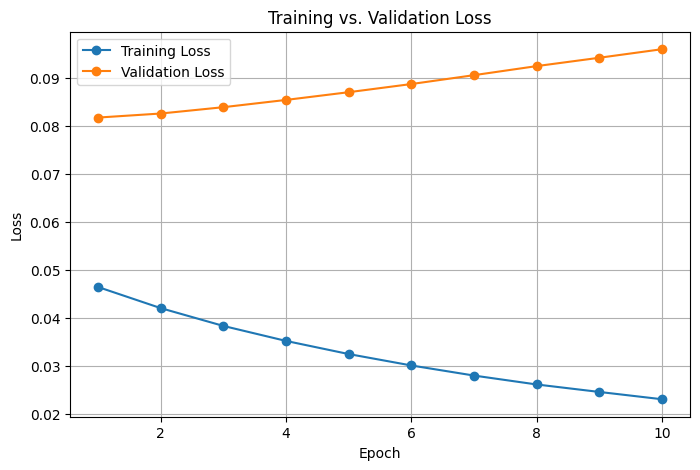

In [ ]:
import matplotlib.pyplot as plt

train_loss = rnn_training.history['loss']
val_loss = rnn_training.history['val_loss']

epochs = range(1, len(train_loss) + 1)


plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, 'o-', label='Training Loss')
plt.plot(epochs, val_loss, 'o-', label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()

plt.grid(True)

plt.show()


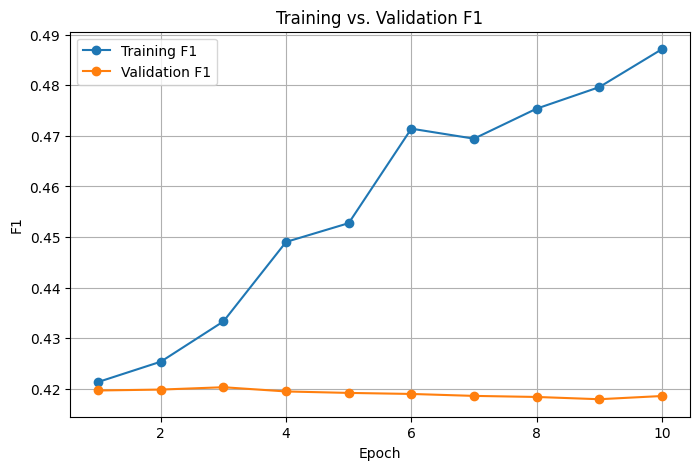

In [ ]:
import matplotlib.pyplot as plt

train_loss = rnn_training.history['f1_m']
val_loss = rnn_training.history['val_f1_m']

epochs = range(1, len(train_loss) + 1)


plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, 'o-', label='Training F1')
plt.plot(epochs, val_loss, 'o-', label='Validation F1')

plt.xlabel('Epoch')
plt.ylabel('F1')
plt.title('Training vs. Validation F1')
plt.legend()

plt.grid(True)

plt.show()

In [ ]:
json_file_path = 'ATE_test_data.json'

# Read the JSON file
with open(json_file_path) as f:
    test_data = json.load(f)


In [ ]:
for key, value in test_data.items():
    word = value['text'].split(" ")
    labels = value['labels']
    new_labels = []
    new_word = []
    for i in range(len(word)):
        if(word[i]==''):
            print("SADf")
            continue
        new_word.append(word[i])
    value['word'] = new_word

In [ ]:
X_test = []
tags_for_testing = []
sentence_for_testing = []
for key, value in test_data.items():
    word = value['word']
    tags = value['labels']
    sentence = value['text']
    # Pad the entire sentence
    # if len(word) < max_len:
    #     word += [''] * (max_len - len(word))
    #     tags += ['O'] * (max_len - len(tags))

    sentence_for_testing.append(word)
    tags_for_testing.append(tags)

    # Tokenize the entire sentence
    # tokenizer = Tokenizer()
    # tokenizer.fit_on_texts([word])
    X_test.append(word)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_test)
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test,  maxlen= max_len, padding='post', truncating='pre')

In [ ]:
print(X_test[0])
print(sentence_for_training[0])

[491 119   6 149  26   4 186 236  91 492 307   9 493 494   1   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0]
['I', 'charge', 'it', 'at', 'night', 'and', 'skip', 'taking', 'the', 'cord', 'with', 'me', 'because', 'of', 'the', 'good', 'battery', 'life', '.']


In [ ]:

word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(tags_for_testing)                    # fit tokeniser on data
y_test = word_tokenizer.texts_to_sequences(tags_for_testing)  # use the tokeniser to encode input sequence


# for i in range(len(y_test)):
#     for j in range(len(y_test[i])):
#         y_test[i][j]-=1

y_test = pad_sequences(y_test,  maxlen= max_len, padding='post', truncating='pre')
y_test = to_categorical(y_test)


In [ ]:
print(y_test.shape)
# print(tags_for_testing[0])

(328, 78, 4)


In [ ]:
# take 5 random sentence, print it , its label and the predicted label



In [ ]:
# Evaluate the model
results = rnn_model.evaluate(X_test, y_test, verbose=1)

# Extracting loss and metrics from the results
loss = results[0]
metrics = results[1:]

# Printing loss and metrics
print("Loss:", loss)
print("Metrics:", metrics)

11/11 [==============================] - 0s 28ms/step - loss: 0.1243 - acc: 0.9682 - f1_m: 0.3676 - precision_m: 0.9712 - recall_m: 0.9615
Loss: 0.12434762716293335
Metrics: [0.9681832194328308, 0.36756810545921326, 0.9711622595787048, 0.96146559715271]


In [ ]:
# calculate f1 score

from sklearn.metrics import f1_score
y_pred = rnn_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_test = np.argmax(y_test, axis=-1)
f1 = f1_score(y_test.flatten(), y_pred.flatten(), average='macro')
print(f1)

11/11 [==============================] - 0s 9ms/step
0.4869181753317442


**LSTM**

In [ ]:

from gensim.models import KeyedVectors# Load pre-trained model
# import torch
# import torch.nn as nn
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np
import keras


In [ ]:
# Specify the path to your JSON file
json_file_path = 'ATE_training_data.json'

# Read the JSON file
with open(json_file_path) as f:
    data = json.load(f)

# data
# print(len(data))

# Specify the path to your JSON file
json_file_path = 'ATE_validation_data.json'

# Read the JSON file
with open(json_file_path) as f:
    validation_data = json.load(f)




In [ ]:
# max_len=0
# for key,value in data.items():
#     max_len=max(max_len,len(value['text'].split(" ")))
max_len=100


In [ ]:
c=1
for key, value in data.items():
    word = value['text'].split(" ")
    labels = value['labels']
    new_labels = []
    new_word = []
    for i in range(len(word)):
        if(word[i]==''):
            print(word)
            continue
        # new_labels.append(labels[i])
        new_word.append(word[i])
    # value['labels'] = new_labels
    value['word'] = new_word


for key, value in validation_data.items():
    word = value['text'].split(" ")
    labels = value['labels']
    new_labels = []
    new_word = []
    for i in range(len(word)):
        if(word[i]==''):
            continue
        # new_labels.append(labels[i])
        new_word.append(word[i])
    # value['labels'] = new_labels
    value['word'] = new_word

In [ ]:
sentence_for_training = []
tags_for_training = []
X_train = []

for key, value in data.items():
    word = value['word']
    tags = value['labels']
    sentence = value['text']
    # Pad the entire sentence
    # if len(word) < max_len:
    #     word += [''] * (max_len - len(word))
    #     tags += ['O'] * (max_len - len(tags))

    sentence_for_training.append(word)
    tags_for_training.append(tags)

    # # Tokenize the entire sentence
    # tokenizer = Tokenizer()
    # tokenizer.fit_on_texts([word])
    X_train.append(word)


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=max_len, padding='post', truncating='pre')
# print(max_len)
# for i in X_train:
#     if(len(i)>max_len):
#         print(len(i))

In [ ]:
# len(y_train[0])

In [ ]:
# len(y_test[0])

In [ ]:
print(X_train[5])
print(sentence_for_training[5])

[ 327    3    1  414 1169    4  199 1170 1171  200  136   72  268  156
  805   41  806   15  328  201   36    2    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
['However', ',', 'the', 'multi-touch', 'gestures', 'and', 'large', 'tracking', 'area', 'make', 'having', 'an', 'external', 'mouse', 'unnecessary', '(', 'unless', 'you', "'re", 'gaming', ')', '.']


In [ ]:
X_train.shape

(906, 100)

In [ ]:
sentence_for_validation = []
tags_for_validation = []
X_validation = []

for key, value in validation_data.items():
    word = value['word']
    tags = value['labels']

    # # Pad the entire sentence
    # if len(word) < max_len:
    #     word += [''] * (max_len - len(word))
    #     tags += ['O'] * (max_len - len(tags))

    sentence_for_validation.append(word)
    tags_for_validation.append(tags)

    # Tokenize the entire sentence
    # tokenizer = Tokenizer()
    # tokenizer.fit_on_texts([word])
    X_validation.append(word)


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_validation)
X_validation = tokenizer.texts_to_sequences(X_validation)
X_validation = pad_sequences(X_validation, maxlen= max_len, padding='post', truncating='pre')
# y_validation = pad_sequences(y_validation, batch_first=True, padding_value=0)


In [ ]:
print(X_train.shape)

(906, 100)


In [ ]:
print(sentence_for_training[0])

['I', 'charge', 'it', 'at', 'night', 'and', 'skip', 'taking', 'the', 'cord', 'with', 'me', 'because', 'of', 'the', 'good', 'battery', 'life', '.']


In [ ]:
vocab = []
for i in sentence_for_training:
    for j in i:
        if j not in vocab:
            vocab.append(j)
# vocab = list(set(vocab))
print(len(vocab))    #30220

2740


In [ ]:
vocab_weight = {}
c = 0
for i in vocab:
   if i in model_GloVe:
       vocab_weight[i] = model_GloVe[i]

In [ ]:
# give code to make embedding weight matrix
# vocab=len(vocab)+1
weights = np.zeros((len(vocab)+1, 300))
for i in range(len(vocab)):
    if(vocab[i] in vocab_weight):
        weights[i] = vocab_weight[vocab[i]]
    # weights[i] = vocab_weight[vocab[i]]



In [ ]:
# weights = []
# for i in vocab:
#     weights.append(vocab_weight[i])
# weights = np.array(weights)
weights.shape
# # weights

(2741, 300)

In [ ]:
y_train=[]
y_validation=[]
y_test=[]

word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(tags_for_training)                    # fit tokeniser on data
y_train = word_tokenizer.texts_to_sequences(tags_for_training)  # use the tokeniser to encode input sequence.
y_train = pad_sequences(y_train, maxlen= max_len, padding='post', truncating='pre')


# for i in range(len(y_train)):
#     for j in range(len(y_train[i])):
#         y_train[i][j]-=1


word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(tags_for_training)                    # fit tokeniser on data
y_validation = word_tokenizer.texts_to_sequences(tags_for_validation)  # use the tokeniser to encode input sequence
y_validation = pad_sequences(y_validation,  maxlen= max_len, padding='post', truncating='pre')

# for i in range(len(y_validation)):
#     for j in range(len(y_validation[i])):
#         y_validation[i][j]-=1


# y_train = pad_sequences(y_train, maxlen= max_len, padding='pre', truncating='post')
# y_validation = pad_sequences(y_validation,maxlen= max_len, padding='pre', truncating='post')
y_train = to_categorical(y_train)
y_validation = to_categorical(y_validation)


# y_train.shape
# y_validation.shape
# y_train

In [ ]:
print(y_train.shape)
print(y_validation.shape)

(906, 100, 4)
(219, 100, 4)


In [ ]:
from tensorflow.keras import Model,Input
from keras.models import Sequential

from tensorflow.keras.layers import LSTM,Embedding,Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D,Bidirectional
# create architecture

# VOCABULARY_SIZE = len(vocab)


lstm_model = Sequential()
lstm_model.add(Embedding(input_dim     = len(vocab)+1,         # vocabulary size - number of unique words in data
                         output_dim    = 300,          # length of vector with which each word is represented
                         input_length  = max_len,          # length of input sequence
                         weights       = [weights],     # word embedding matrix
                         trainable     = True                     # True - update embeddings_weight matrix
))
lstm_model.add(LSTM(64, return_sequences=True))
lstm_model.add(TimeDistributed(Dense(4, activation='softmax')))

In [ ]:
from keras import backend as K
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=0)
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)), axis=0)
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)), axis=0)

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())

    f1 = 2 * precision * recall / (precision + recall + K.epsilon())

    macro_f1 = K.mean(f1)
    return macro_f1

# compile the model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])




In [ ]:
import numpy as np

# Convert input data to numpy arrays
# X_train_np = np.array(X_train)
# X_validation_np = np.array(X_validation)
# Reshape the input data to remove the extra dimension
X_train_np = np.array(X_train)
X_validation_np = np.array(X_validation)

y_train_np = np.array(y_train)
y_validation_np = np.array(y_validation)

In [ ]:
print("Shape of X_train_np:", X_train_np.shape)
print("Shape of X_validation_np:", X_validation_np.shape)
print("Shape of y_train_np:", y_train_np.shape)
print("Shape of y_validation_np:", y_validation_np.shape)

Shape of X_train_np: (906, 100)
Shape of X_validation_np: (219, 100)
Shape of y_train_np: (906, 100, 4)
Shape of y_validation_np: (219, 100, 4)


In [ ]:
lstm_training = lstm_model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_validation, y_validation))


Epoch 1/10
8/8 [==============================] - 5s 376ms/step - loss: 0.7181 - acc: 0.8262 - f1_m: 0.1681 - precision_m: 0.7500 - recall_m: 0.5914 - val_loss: 0.3031 - val_acc: 0.8313 - val_f1_m: 0.2374 - val_precision_m: 0.9973 - val_recall_m: 0.8071
Epoch 2/10
8/8 [==============================] - 3s 427ms/step - loss: 0.2658 - acc: 0.8637 - f1_m: 0.2388 - precision_m: 0.9946 - recall_m: 0.8084 - val_loss: 0.2079 - val_acc: 0.9595 - val_f1_m: 0.2471 - val_precision_m: 0.9969 - val_recall_m: 0.8096
Epoch 3/10
8/8 [==============================] - 2s 285ms/step - loss: 0.1812 - acc: 0.9725 - f1_m: 0.3261 - precision_m: 0.9910 - recall_m: 0.8826 - val_loss: 0.1459 - val_acc: 0.9720 - val_f1_m: 0.4013 - val_precision_m: 0.9793 - val_recall_m: 0.9393
Epoch 4/10
8/8 [==============================] - 2s 276ms/step - loss: 0.1369 - acc: 0.9698 - f1_m: 0.3757 - precision_m: 0.9737 - recall_m: 0.9451 - val_loss: 0.1263 - val_acc: 0.9681 - val_f1_m: 0.4007 - val_precision_m: 0.9712 - val_r

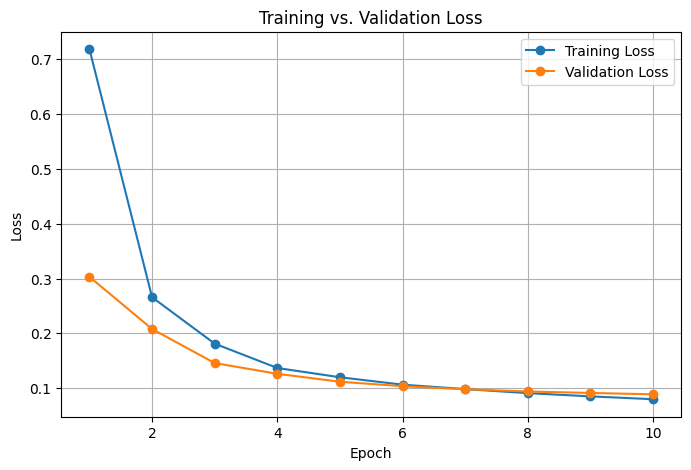

In [ ]:
import matplotlib.pyplot as plt

train_loss = lstm_training.history['loss']
val_loss = lstm_training.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, 'o-', label='Training Loss')
plt.plot(epochs, val_loss, 'o-', label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()

plt.grid(True)

plt.show()


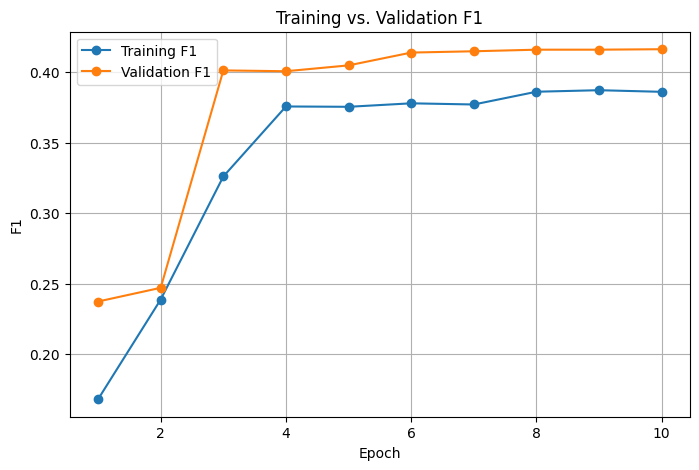

In [ ]:
import matplotlib.pyplot as plt

train_loss = lstm_training.history['f1_m']
val_loss = lstm_training.history['val_f1_m']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, 'o-', label='Training F1')
plt.plot(epochs, val_loss, 'o-', label='Validation F1')

plt.xlabel('Epoch')
plt.ylabel('F1')
plt.title('Training vs. Validation F1')
plt.legend()

plt.grid(True)

plt.show()


In [ ]:
json_file_path = 'ATE_test_data.json'

# Read the JSON file
with open(json_file_path) as f:
    test_data = json.load(f)


In [ ]:
for key, value in test_data.items():
    word = value['text'].split(" ")
    labels = value['labels']
    new_labels = []
    new_word = []
    for i in range(len(word)):
        if(word[i]==''):
            print("SADf")
            continue
        new_word.append(word[i])
    value['word'] = new_word

In [ ]:
X_test = []
tags_for_testing = []
sentence_for_testing = []
for key, value in test_data.items():
    word = value['word']
    tags = value['labels']
    sentence = value['text']
    # Pad the entire sentence
    # if len(word) < max_len:
    #     word += [''] * (max_len - len(word))
    #     tags += ['O'] * (max_len - len(tags))

    sentence_for_testing.append(word)
    tags_for_testing.append(tags)

    # Tokenize the entire sentence
    # tokenizer = Tokenizer()
    # tokenizer.fit_on_texts([word])
    X_test.append(word)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_test)
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test,  maxlen= max_len, padding='post', truncating='pre')

In [ ]:
print(X_test[0])
print(sentence_for_training[0])

[491 119   6 149  26   4 186 236  91 492 307   9 493 494   1   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
['I', 'charge', 'it', 'at', 'night', 'and', 'skip', 'taking', 'the', 'cord', 'with', 'me', 'because', 'of', 'the', 'good', 'battery', 'life', '.']


In [ ]:

word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(tags_for_testing)                    # fit tokeniser on data
y_test = word_tokenizer.texts_to_sequences(tags_for_testing)  # use the tokeniser to encode input sequence


# for i in range(len(y_test)):
#     for j in range(len(y_test[i])):
#         y_test[i][j]-=1

y_test = pad_sequences(y_test,  maxlen= max_len, padding='post', truncating='pre')
y_test = to_categorical(y_test)


In [ ]:
print(y_test.shape)
# print(tags_for_testing[0])

(328, 100, 4)


In [ ]:
# Evaluate the model
results = rnn_model.evaluate(X_test, y_test, verbose=1)

# Extracting loss and metrics from the results
loss = results[0]
metrics = results[1:]

# Printing loss and metrics
print("Loss:", loss)
print("Metrics:", metrics)


11/11 [==============================] - 0s 27ms/step - loss: 0.1129 - acc: 0.9718 - f1_m: 0.3422 - precision_m: 0.9747 - recall_m: 0.9673
Loss: 0.11289666593074799
Metrics: [0.971768319606781, 0.3421818017959595, 0.9746668338775635, 0.9673296213150024]


In [ ]:
# calculate f1 score

from sklearn.metrics import f1_score
y_pred = lstm_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_test = np.argmax(y_test, axis=-1)
f1 = f1_score(y_test.flatten(), y_pred.flatten(), average='macro')
print(f1)

11/11 [==============================] - 1s 34ms/step
0.47194246402119094


**GRU**

In [ ]:

from gensim.models import KeyedVectors# Load pre-trained model
# import torch
# import torch.nn as nn
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np
import keras


In [ ]:
# Specify the path to your JSON file
json_file_path = 'ATE_training_data.json'

# Read the JSON file
with open(json_file_path) as f:
    data = json.load(f)

# data
# print(len(data))

# Specify the path to your JSON file
json_file_path = 'ATE_validation_data.json'

# Read the JSON file
with open(json_file_path) as f:
    validation_data = json.load(f)




In [ ]:
# max_len=0
# for key,value in data.items():
#     max_len=max(max_len,len(value['text'].split(" ")))
max_len=100


In [ ]:
c=1
for key, value in data.items():
    word = value['text'].split(" ")
    labels = value['labels']
    new_labels = []
    new_word = []
    for i in range(len(word)):
        if(word[i]==''):
            print(word)
            continue
        # new_labels.append(labels[i])
        new_word.append(word[i])
    # value['labels'] = new_labels
    value['word'] = new_word


for key, value in validation_data.items():
    word = value['text'].split(" ")
    labels = value['labels']
    new_labels = []
    new_word = []
    for i in range(len(word)):
        if(word[i]==''):
            continue
        # new_labels.append(labels[i])
        new_word.append(word[i])
    # value['labels'] = new_labels
    value['word'] = new_word

In [ ]:
sentence_for_training = []
tags_for_training = []
X_train = []

for key, value in data.items():
    word = value['word']
    tags = value['labels']
    sentence = value['text']
    # Pad the entire sentence
    # if len(word) < max_len:
    #     word += [''] * (max_len - len(word))
    #     tags += ['O'] * (max_len - len(tags))

    sentence_for_training.append(word)
    tags_for_training.append(tags)

    # # Tokenize the entire sentence
    # tokenizer = Tokenizer()
    # tokenizer.fit_on_texts([word])
    X_train.append(word)


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=max_len, padding='post', truncating='pre')
# print(max_len)
# for i in X_train:
#     if(len(i)>max_len):
#         print(len(i))

In [ ]:
sentence_for_validation = []
tags_for_validation = []
X_validation = []

for key, value in validation_data.items():
    word = value['word']
    tags = value['labels']

    # # Pad the entire sentence
    # if len(word) < max_len:
    #     word += [''] * (max_len - len(word))
    #     tags += ['O'] * (max_len - len(tags))

    sentence_for_validation.append(word)
    tags_for_validation.append(tags)

    # Tokenize the entire sentence
    # tokenizer = Tokenizer()
    # tokenizer.fit_on_texts([word])
    X_validation.append(word)


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_validation)
X_validation = tokenizer.texts_to_sequences(X_validation)
X_validation = pad_sequences(X_validation, maxlen= max_len, padding='post', truncating='pre')
# y_validation = pad_sequences(y_validation, batch_first=True, padding_value=0)


In [ ]:
print(X_train.shape)

(906, 100)


In [ ]:
vocab = []
for i in sentence_for_training:
    for j in i:
        if j not in vocab:
            vocab.append(j)
# vocab = list(set(vocab))
print(len(vocab))    #30220

2740


In [ ]:
vocab_weight = {}
c = 0
for i in vocab:
   if i in model_GloVe:
       vocab_weight[i] = model_GloVe[i]

In [ ]:
# give code to make embedding weight matrix
# vocab=len(vocab)+1
weights = np.zeros((len(vocab)+1, 300))
for i in range(len(vocab)):
    if(vocab[i] in vocab_weight):
        weights[i] = vocab_weight[vocab[i]]
    # weights[i] = vocab_weight[vocab[i]]



In [ ]:
# weights = []
# for i in vocab:
#     weights.append(vocab_weight[i])
# weights = np.array(weights)
weights.shape
# # weights

(2741, 300)

In [ ]:
y_train=[]
y_validation=[]
y_test=[]

word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(tags_for_training)                    # fit tokeniser on data
y_train = word_tokenizer.texts_to_sequences(tags_for_training)  # use the tokeniser to encode input sequence.
y_train = pad_sequences(y_train, maxlen= max_len, padding='post', truncating='pre')


# for i in range(len(y_train)):
#     for j in range(len(y_train[i])):
#         y_train[i][j]-=1


word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(tags_for_training)                    # fit tokeniser on data
y_validation = word_tokenizer.texts_to_sequences(tags_for_validation)  # use the tokeniser to encode input sequence
y_validation = pad_sequences(y_validation,  maxlen= max_len, padding='post', truncating='pre')

# for i in range(len(y_validation)):
#     for j in range(len(y_validation[i])):
#         y_validation[i][j]-=1


# y_train = pad_sequences(y_train, maxlen= max_len, padding='pre', truncating='post')
# y_validation = pad_sequences(y_validation,maxlen= max_len, padding='pre', truncating='post')
y_train = to_categorical(y_train)
y_validation = to_categorical(y_validation)


# y_train.shape
# y_validation.shape
# y_train

In [ ]:
print(y_train.shape)
print(y_validation.shape)

(906, 100, 4)
(219, 100, 4)


In [ ]:
from tensorflow.keras import Model,Input
from keras.models import Sequential

from tensorflow.keras.layers import GRU,SimpleRNN,LSTM,Embedding,Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D,Bidirectional
# create architecture

# VOCABULARY_SIZE = len(vocab)


gru_model = Sequential()
gru_model.add(Embedding(input_dim     = len(vocab)+1,         # vocabulary size - number of unique words in data
                         output_dim    = 300,          # length of vector with which each word is represented
                         input_length  = max_len,          # length of input sequence
                         weights       = [weights],     # word embedding matrix
                         trainable     = True                     # True - update embeddings_weight matrix
))
gru_model.add(GRU(64, return_sequences=True))
gru_model.add(TimeDistributed(Dense(4, activation='softmax')))

In [ ]:
from keras import backend as K
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=0)
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)), axis=0)
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)), axis=0)

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())

    f1 = 2 * precision * recall / (precision + recall + K.epsilon())

    macro_f1 = K.mean(f1)
    return macro_f1

# compile the model
gru_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])




In [ ]:
import numpy as np

# Convert input data to numpy arrays
# X_train_np = np.array(X_train)
# X_validation_np = np.array(X_validation)
# Reshape the input data to remove the extra dimension
X_train_np = np.array(X_train)
X_validation_np = np.array(X_validation)

y_train_np = np.array(y_train)
y_validation_np = np.array(y_validation)

# Train the model
gru_training = gru_model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_validation, y_validation))
#write code to print the training and validation loss and f1 macro not the graph






Epoch 1/10
8/8 [==============================] - 6s 473ms/step - loss: 0.8237 - acc: 0.7190 - f1_m: 0.1476 - precision_m: 0.6249 - recall_m: 0.4987 - val_loss: 0.3357 - val_acc: 0.8532 - val_f1_m: 0.2374 - val_precision_m: 0.9971 - val_recall_m: 0.8072
Epoch 2/10
8/8 [==============================] - 2s 222ms/step - loss: 0.2823 - acc: 0.8789 - f1_m: 0.2360 - precision_m: 0.9939 - recall_m: 0.8066 - val_loss: 0.2170 - val_acc: 0.9430 - val_f1_m: 0.2440 - val_precision_m: 0.9937 - val_recall_m: 0.8104
Epoch 3/10
8/8 [==============================] - 2s 232ms/step - loss: 0.1883 - acc: 0.9600 - f1_m: 0.3038 - precision_m: 0.9919 - recall_m: 0.8622 - val_loss: 0.1429 - val_acc: 0.9780 - val_f1_m: 0.4051 - val_precision_m: 0.9831 - val_recall_m: 0.9500
Epoch 4/10
8/8 [==============================] - 2s 232ms/step - loss: 0.1253 - acc: 0.9780 - f1_m: 0.3716 - precision_m: 0.9817 - recall_m: 0.9635 - val_loss: 0.1041 - val_acc: 0.9800 - val_f1_m: 0.4165 - val_precision_m: 0.9806 - val_r

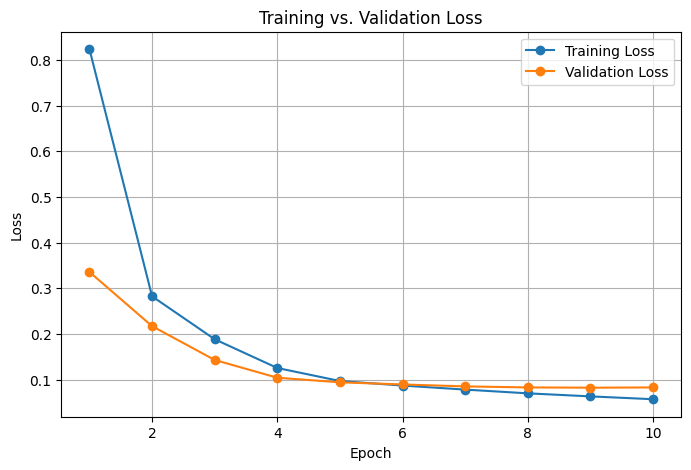

In [ ]:
import matplotlib.pyplot as plt

train_loss = gru_training.history['loss']
val_loss = gru_training.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, 'o-', label='Training Loss')
plt.plot(epochs, val_loss, 'o-', label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()

plt.grid(True)

plt.show()


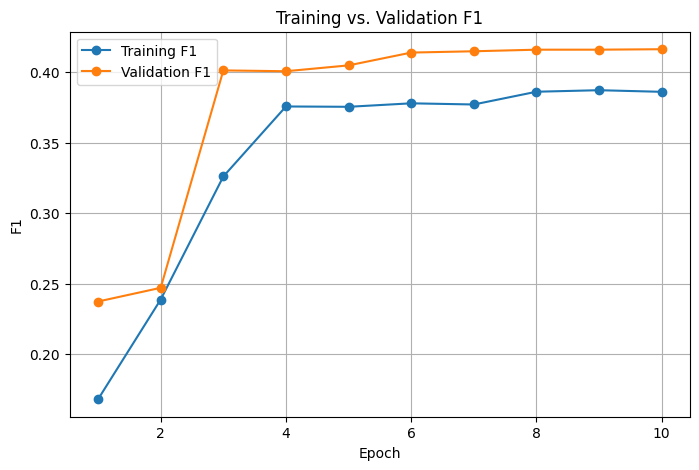

In [ ]:
import matplotlib.pyplot as plt

train_loss = lstm_training.history['f1_m']
val_loss = lstm_training.history['val_f1_m']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, 'o-', label='Training F1')
plt.plot(epochs, val_loss, 'o-', label='Validation F1')

plt.xlabel('Epoch')
plt.ylabel('F1')
plt.title('Training vs. Validation F1')
plt.legend()

plt.grid(True)

plt.show()


In [ ]:
json_file_path = 'ATE_test_data.json'

# Read the JSON file
with open(json_file_path) as f:
    test_data = json.load(f)


In [ ]:
for key, value in test_data.items():
    word = value['text'].split(" ")
    labels = value['labels']
    new_labels = []
    new_word = []
    for i in range(len(word)):
        if(word[i]==''):
            print("SADf")
            continue
        new_word.append(word[i])
    value['word'] = new_word

In [ ]:
X_test = []
tags_for_testing = []
sentence_for_testing = []
for key, value in test_data.items():
    word = value['word']
    tags = value['labels']
    sentence = value['text']
    # Pad the entire sentence
    # if len(word) < max_len:
    #     word += [''] * (max_len - len(word))
    #     tags += ['O'] * (max_len - len(tags))

    sentence_for_testing.append(word)
    tags_for_testing.append(tags)

    # Tokenize the entire sentence
    # tokenizer = Tokenizer()
    # tokenizer.fit_on_texts([word])
    X_test.append(word)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_test)
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test,  maxlen= max_len, padding='post', truncating='pre')

In [ ]:
print(X_test[0])
print(sentence_for_training[0])

[491 119   6 149  26   4 186 236  91 492 307   9 493 494   1   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
['I', 'charge', 'it', 'at', 'night', 'and', 'skip', 'taking', 'the', 'cord', 'with', 'me', 'because', 'of', 'the', 'good', 'battery', 'life', '.']


In [ ]:

word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(tags_for_testing)                    # fit tokeniser on data
y_test = word_tokenizer.texts_to_sequences(tags_for_testing)  # use the tokeniser to encode input sequence


# for i in range(len(y_test)):
#     for j in range(len(y_test[i])):
#         y_test[i][j]-=1

y_test = pad_sequences(y_test,  maxlen= max_len, padding='post', truncating='pre')
y_test = to_categorical(y_test)


In [ ]:
print(y_test.shape)
# print(tags_for_testing[0])

(328, 100, 4)


In [ ]:
# take 5 random sentence, print it , its label and the predicted label



In [ ]:
# Evaluate the model
results = rnn_model.evaluate(X_test, y_test, verbose=1)

# Extracting loss and metrics from the results
loss = results[0]
metrics = results[1:]

# Printing loss and metrics
print("Loss:", loss)
print("Metrics:", metrics)


11/11 [==============================] - 0s 25ms/step - loss: 0.1129 - acc: 0.9718 - f1_m: 0.3422 - precision_m: 0.9747 - recall_m: 0.9673
Loss: 0.11289666593074799
Metrics: [0.971768319606781, 0.3421818017959595, 0.9746668338775635, 0.9673296213150024]


In [ ]:
# calculate f1 score

from sklearn.metrics import f1_score
y_pred = gru_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_test = np.argmax(y_test, axis=-1)
f1 = f1_score(y_test.flatten(), y_pred.flatten(), average='macro')
print(f1)

11/11 [==============================] - 1s 27ms/step
0.4885332363193045
